In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
from scipy import stats
%matplotlib inline

In [2]:
mpl.rcParams.update({'text.usetex': True,
                     'text.color':'k',
                     'lines.linewidth': 2,
                     'lines.markersize': 12,
                     'font.size': 34, 
                     'font.family': 'FreeSerif',
                     'axes.grid': True,
                     'axes.facecolor' :'w',
                     'axes.labelcolor':'k',
                     'axes.titlesize': 24,
                     'axes.labelsize': 24,
                     'axes.prop_cycle':plt.cycler(color=plt.cm.Dark2.colors),
                     'xtick.color':'k',
                     'xtick.labelsize': 24,
                     'ytick.color':'k',
                     'ytick.labelsize': 24,
                     'grid.color': '#555555',
                     'legend.facecolor':'w',
                     'legend.fontsize': 24,
                     'legend.borderpad': 0.6,
                     'figure.figsize': (16, 12),
                     'figure.facecolor' : 'w'})

In [3]:
def randInts(num, low=0, high=100):
    '''Returns num random integers between 0 and 99 inclusive with no duplicates'''
    arr = np.array([])
    uarr = np.array([])
    while len(uarr) < num:
        short = num - len(uarr)
        newInts = np.random.randint(low, high, size=short)
        arr = np.append(arr, newInts)
        uarr = np.unique(arr)
    return uarr

In [4]:
def runSimulation():
    totalNumberOfCards = 100
    sonsDeck = np.array([])
    week = 0
    decksBought = 0
    while len(sonsDeck) < totalNumberOfCards:
        week += 1
        cash = 10
        while cash > 0:
            decksBought += 1
            cash -= 1
            currentCards = randInts(10)
            sonsDeck = np.unique( np.append(sonsDeck, currentCards) ) # add new cards to deck, only count new uniques
            if len(sonsDeck) == totalNumberOfCards:
                break
        #print 'Number of Unique Cards = {0} after {1} decks bought (Week {2})'.format( len(sonsDeck), decksBought, week )
    return week, decksBought

In [5]:
startTime = time.time()
simulationNumber = 100000
weeksArr = np.array([])
decksArr = np.array([])
for ii in np.arange(simulationNumber):
    curWeek, curDeck = runSimulation()
    weeksArr = np.append(weeksArr, curWeek)
    decksArr = np.append(decksArr, curDeck)
print 'Finished {0} simulations in {1} seconds'.format(simulationNumber, time.time() - startTime)

Finished 100000 simulations in 213.257874012 seconds


In [6]:
weeksMean = np.mean(weeksArr)
weeksMedian = np.median(weeksArr)
weeksVariance = np.var(weeksArr)

decksMean = np.mean(decksArr)
decksMedian = np.median(decksArr)
decksVariance = np.var(decksArr)

print 'Mean Weeks = {0}'.format(weeksMean)
print 'Median Weeks = {0}'.format(weeksMedian)
print 'Mean Decks = {0}'.format(decksMean)
print 'Median Decks = {0}'.format(decksMedian)

Mean Weeks = 5.44686
Median Weeks = 5.0
Mean Decks = 49.96069
Median Decks = 48.0


/Users/ccahilla/pyenv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ccahilla/pyenv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/ccahilla/pyenv/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'FreeSerif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


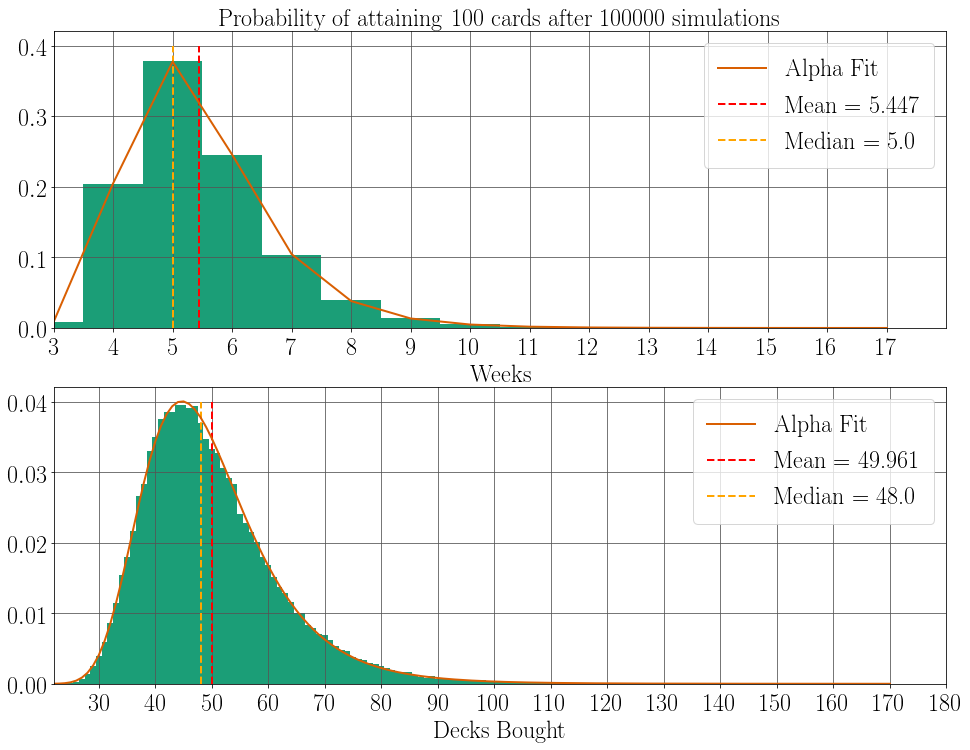

In [7]:
bins1 = np.arange(min(weeksArr), max(weeksArr))
bins2 = np.arange(min(decksArr), max(decksArr))

fig = plt.figure(figsize=(16,12))
s1 = fig.add_subplot(211)
s2 = fig.add_subplot(212)

h1 = s1.hist(weeksArr, bins=bins1, normed=True, align='left')
s1.vlines(x=weeksMean, ymin=0, ymax=0.4, color='red', linestyles='--', label='Mean = {0:.3f}'.format(weeksMean))
s1.vlines(x=weeksMedian, ymin=0, ymax=0.4, color='orange', linestyles='--', label='Median = {0}'.format(weeksMedian))
weeksFit = stats.alpha.fit(weeksArr)
alphaPDF = stats.alpha.pdf(bins1, weeksFit[0], weeksFit[1], weeksFit[2]) # now get theoretical values in our interval  
s1.plot(bins1, alphaPDF, label="Alpha Fit") # plot it

h2 = s2.hist(decksArr, bins=bins2, normed=True, align='left')
s2.vlines(x=decksMean, ymin=0, ymax=0.04, color='red', linestyles='--', label='Mean = {0:.3f}'.format(decksMean))
s2.vlines(x=decksMedian, ymin=0, ymax=0.04, color='orange', linestyles='--', label='Median = {0}'.format(decksMedian))
decksFit = stats.alpha.fit(decksArr)
alphaPDF2 = stats.alpha.pdf(bins2, decksFit[0], decksFit[1], decksFit[2]) # now get theoretical values in our interval  
s2.plot(bins2, alphaPDF2, label="Alpha Fit") # plot it

s1.set_xlim([min(weeksArr), max(weeksArr)])
s2.set_xlim([min(decksArr), max(decksArr)])

s1.set_xticks(np.arange(min(weeksArr), max(weeksArr)))
s2.set_xticks(10*np.arange(3,19))

s1.set_xlabel('Weeks')
s1.set_title('Probability of attaining 100 cards after {0} simulations'.format(simulationNumber))
s2.set_xlabel('Decks Bought')

s1.legend()
s2.legend()

plt.savefig('./plots/{0}_Riddler.pdf'.format(time.strftime('%Y%m%d')))
plt.show()

array([8.97008970e-03, 2.04092041e-01, 3.77543775e-01, 2.44402444e-01,
       1.03661037e-01, 3.96803968e-02, 1.41301413e-02, 4.95004950e-03,
       1.70001700e-03, 5.70005700e-04, 2.00002000e-04, 7.00007000e-05,
       2.00002000e-05, 1.00001000e-05])